In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [34]:
#IMPORTING NECESSARY LIBRARIES
import  os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Flatten, Dense , Dropout, Input




In [28]:
#prepocessing
#Image dimensions and batch size
img_width, img_height=150,150
batch_size=32 #there will be 32 img

#Data generators
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True

)

val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True

)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.


In [29]:
#map the indices
class_mapping=train_generator.class_indices
#print(class_mapping)
#extract the class names
class_names=list(class_mapping.keys())
print("Class Names:", class_names)


Class Names: ['fire', 'nofire']


In [14]:
# build CNN model
model=Sequential([
    Input(shape=(img_width,img_height,3)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

In [7]:
# to ensure the gpu is present
physical_devices=tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices)>0:
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
  print('GPU is used')
else:
  print('GPU is not used')

GPU is used


In [31]:
#load and explore the dataset
train_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [25]:
#list all the classes
classes =os.listdir(train_dir)
num_classes=len(classes)

#Display the class naames
print(f'Number of Classes:{num_classes}')
print(f' Classes:{classes}')



Number of Classes:2
 Classes:['nofire', 'fire']


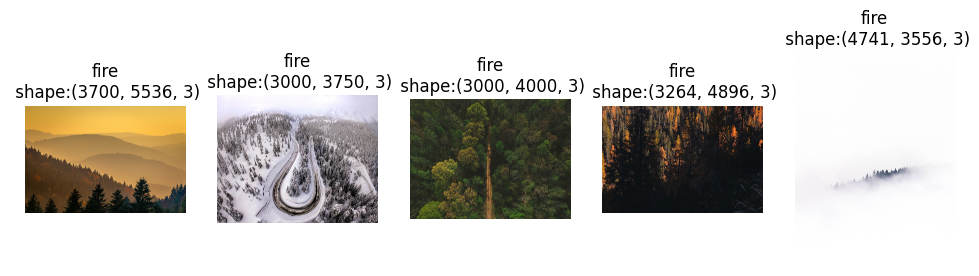

In [26]:
#Lets visualize the images in data set
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)
  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]}\n shape:{img.shape}')
  plt.axis('off')
plt.show()